In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Load the dataset
df = pd.read_csv('weatherAUS.csv')


In [16]:
# Display the number of rows and columns
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')



The dataset has 145460 rows and 9 columns


In [17]:
# Display the first five lines of the data file
df.head()


,Date,Location,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,20.0,24.0,71.0,22.0,16.9,21.8,No
1,2008-12-02,Albury,4.0,22.0,44.0,25.0,17.2,24.3,No
2,2008-12-03,Albury,19.0,26.0,38.0,30.0,21.0,23.2,No
3,2008-12-04,Albury,11.0,9.0,45.0,16.0,18.1,26.5,No
4,2008-12-05,Albury,7.0,20.0,82.0,33.0,17.8,29.7,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          145460 non-null  object 
 1   Location      145460 non-null  object 
 2   WindSpeed9am  143693 non-null  float64
 3   WindSpeed3pm  142398 non-null  float64
 4   Humidity9am   142806 non-null  float64
 5   Humidity3pm   140953 non-null  float64
 6   Temp9am       143693 non-null  float64
 7   Temp3pm       141851 non-null  float64
 8   RainTomorrow  142193 non-null  object 
dtypes: float64(6), object(3)
memory usage: 10.0+ MB


In [29]:
# Display the data type for each variable
df.dtypes

Date             object
Location         object
WindSpeed9am    float64
WindSpeed3pm    float64
Humidity9am     float64
Humidity3pm     float64
Temp9am         float64
Temp3pm         float64
RainTomorrow      int64
dtype: object

In [15]:
df.drop(columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                      'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Pressure9am', 'Pressure3pm', 
                      'Cloud9am', 'Cloud3pm', 'RainToday'], inplace=True)

In [ ]:
# Replace 'NA' with np.nan
df.replace('NA', np.nan, inplace=True)



In [21]:
# Drop all rows with any null values
df.dropna(inplace=True)

# Verify the changes
print(df.isnull().sum())
print(df.shape)

Date            0
Location        0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainTomorrow    0
dtype: int64
(136996, 9)


In [ ]:
feature_set = df[[ 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
target_set = df['RainTomorrow']

target_set.replace({'No': 0, 'Yes': 1}, inplace=True)

/var/folders/zj/_p0jdvcj0v77npwz2g8xc_gh0000gn/T/ipykernel_69578/4276384329.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_set.replace({'No': 0, 'Yes': 1}, inplace=True)


<Figure size 1000x800 with 0 Axes>

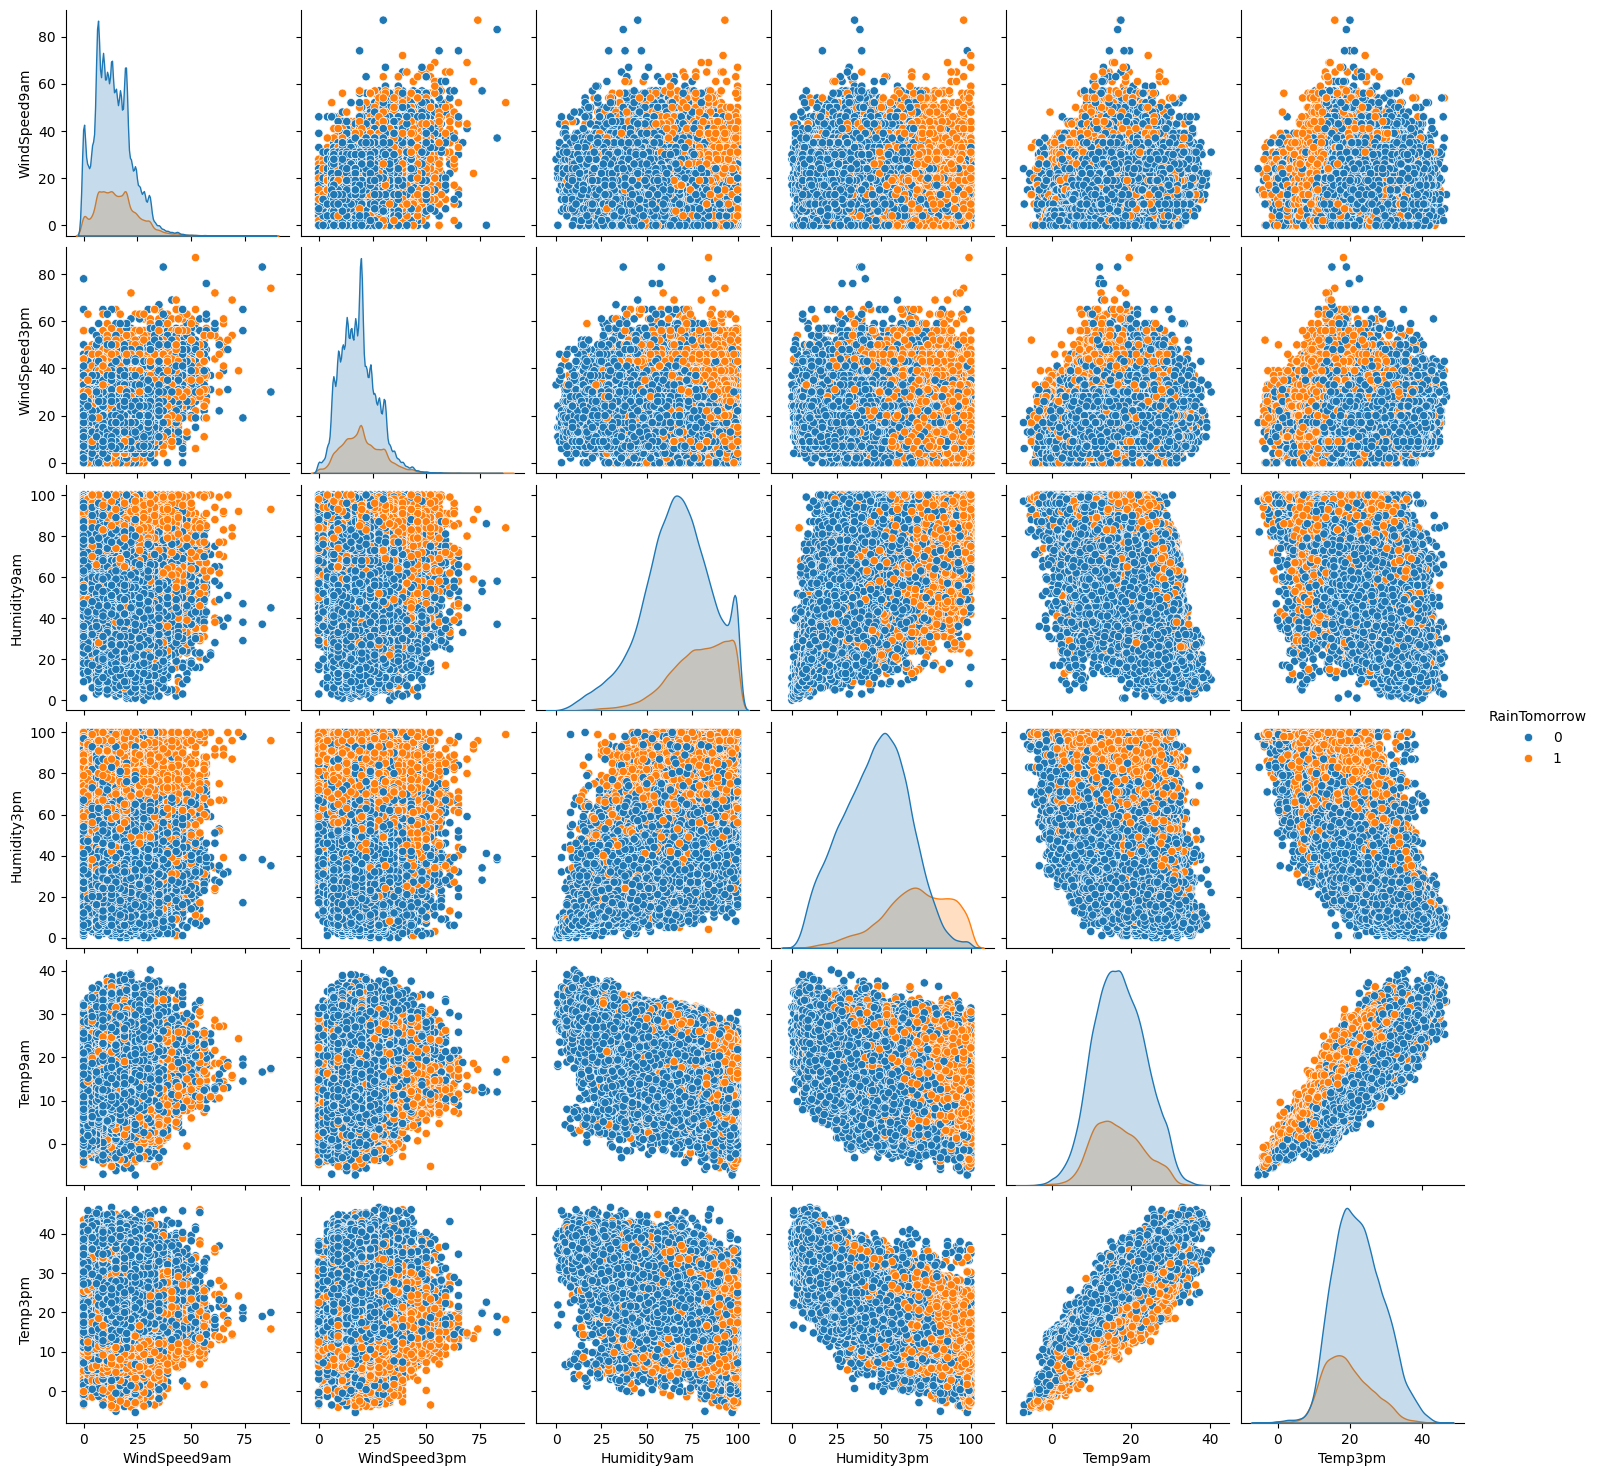

In [ ]:
plt.figure(figsize=(10, 8))

plot_data = feature_set.copy()
plot_data['RainTomorrow'] = target_set

# Create pairplot
sns.pairplot(plot_data, hue='RainTomorrow')
plt.show()

In [ ]:

feature_train, feature_test, target_train, target_test = train_test_split(feature_set, target_set, test_size=0.2, random_state=42)

In [31]:
logreg = LogisticRegression(solver = 'lbfgs')

logreg.fit(feature_train, target_train)

LogisticRegression()

In [28]:
predictions= logreg.predict(feature_test)

print('Logistic Regression Model Accuracy:',accuracy_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.8305474452554744


With an accuracy of 83.05%, the logistic regression model correctly predicts whether it will rain tomorrow for the majority of cases in the dataset. Given the class imbalance, where "No Rain" occurs 77.58% of the time and "Rain" only 22.42%, this high accuracy could partially result from the model's tendency to favor the majority class.